In [6]:
import numpy as np


from sklearn.svm import SVR,SVC,LinearSVC,LinearSVR
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.datasets import make_classification,make_regression

In [7]:
samples = 10
features = 20


X = make_regression(n_samples=samples, n_features=features,
                    n_informative=np.random.randint(1,features+1),
                    n_targets=0)[0]

a = np.random.rand(features)+np.random.randint(-20,20,size = features)
b = np.random.rand()+np.random.randint(-20,20)
m,s = 0,3
c = np.sqrt(s)
noise = np.random.normal(loc = m,scale = c,size = X.shape[0])

y = np.logical_and(X@a + b + noise > 0, 1).astype(int)

In [8]:
def svm_classification(x,y,alpha = 1):
    model = LinearSVC(C=alpha,dual = True,max_iter=10000)
    model.fit(x,y)
    
    #print(accuracy_score(y,model.predict(x)))
    return {'a':model.coef_,'b':model.intercept_[0],'model':model}
    
print('Результат работы SVC:',svm_classification(X,y))
print(f'Изначальные коэффициенты:\na = {a};\nb = {b};\nc = {c}')


Результат работы SVC: {'a': array([[-0.10433246, -0.14491104, -0.17235699,  0.15763042,  0.28810638,
        -0.13879094, -0.30961342, -0.14710124,  0.08688383, -0.0006632 ,
        -0.15280085, -0.03409467, -0.12652445,  0.1333767 ,  0.05689237,
         0.16537652,  0.22812173,  0.1436987 , -0.28862453,  0.2802189 ]]), 'b': 0.2509521172394664, 'model': LinearSVC(C=1, max_iter=10000)}
Изначальные коэффициенты:
a = [ 11.4135265  -19.14323716 -14.15193829  -6.46383072  11.52349178
 -12.07710636 -14.76908338  10.62797172  -2.37664921  -1.12176431
   2.73288975  -1.47298397 -18.87932107  -0.33495031  13.55193477
  19.14708226   9.44941962  18.39853354 -15.54547505  13.7660051 ];
b = 14.061178469313013;
c = 1.7320508075688772


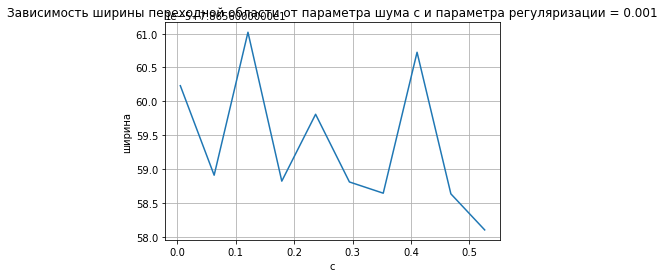

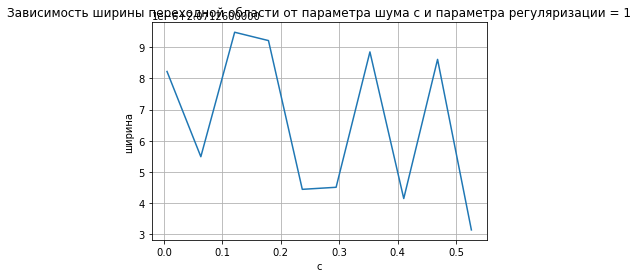

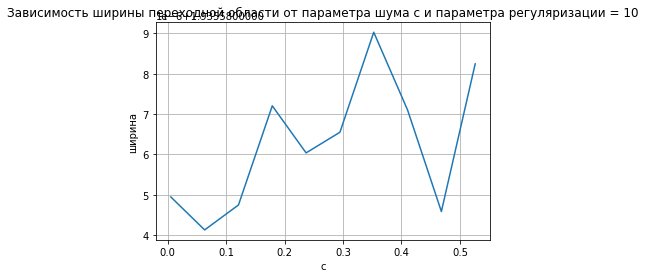

In [9]:
samples = 10
features = 20


X = make_regression(n_samples=samples, n_features=features,
                    n_informative=np.random.randint(1,features+1),
                    n_targets=0)[0]

a = np.random.rand(features)+np.random.randint(-20,20,size = features)
b = np.random.rand()+np.random.randint(-20,20)
m,s = 0,3
c = np.sqrt(s)
noise = np.random.normal(loc = m,scale = c,size = X.shape[0])

y = np.logical_and(X@a + b + noise > 0, 1).astype(int)


c = np.linspace(0.001*(X.max() - X.min()),0.1*(X.max()-X.min()),10)
for C in [0.001,1,10]:

    y_noise = [np.logical_and(X@a + b + np.random.normal(loc = m,scale = k,size = X.shape[0]) > 0, 1).astype(int) for k in c]
    distance = [2/np.linalg.norm(svm_classification(X,y + y_noise[i],alpha = C)['a']) for i in range(X.shape[0]) ]
    plt.plot(c,distance)
    plt.grid()
    plt.title(f'Зависимость ширины переходной области от параметра шума с и параметра регуляризации = {C}')
    plt.xlabel('c')
    plt.ylabel('ширина')
    plt.show()
    
